In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
from matplotlib import font_manager
import matplotlib.patheffects as pe


In [ ]:
%config InlineBackend.figure_formats = ['svg']
dpi = 300
matplotlib.rcParams['figure.dpi']= dpi

figsize = (8, 5)
matplotlib.rcParams['figure.figsize'] = figsize

# plot parameters

blue = '#3C608A'
lightgray = '#d3d8d6'
darkblue = '#2e4465'
darkgray = '#333638'
red = '#e43e47'
lightblue = '#3687e7'
mustard = '#D4AD50'
purple = '#5E233B'
pink = '#F87FAB'


%config InlineBackend.figure_format = 'svg'
# plt.rcParams['figure.dpi'] = 200

fe = font_manager.FontEntry(
    fname= 'bpc_fonts/Redesign-3/Styrene/StyreneA-Black.otf',
    name='StyreneABlack')
font_manager.fontManager.ttflist.insert(0, fe) # or append is fine

fe = font_manager.FontEntry(
    fname= 'bpc_fonts/Redesign-3/Styrene/StyreneA-Medium.otf',
    name='StyreneAMedium')
font_manager.fontManager.ttflist.insert(0, fe) # or append is fine

fe = font_manager.FontEntry(
    fname='bpc_fonts/Redesign-3/Styrene/StyreneA-Regular.otf',
    name='StyreneARegular')
font_manager.fontManager.ttflist.insert(0, fe) # or append is fine

matplotlib.rcParams['font.family'] = 'StyreneARegular' # = 'your custom ttf font name'

ms = 5 # markersize

data_label_fontsize = 9.5



In [192]:
df = pd.read_csv('data/vv_capture_2025-06-04_16-23-48/cleaned_verifier_data.csv', converters={'FIPS code': str}).convert_dtypes()

# Non-VVSG equipment
non_voting_equipment = ['Paper Poll Book',
                        'Hand Counted Paper Ballots', 
                        'Commercial Electronic Poll Book',
                        'In-House Electronic Poll Book',
                        'Data Unavailable',
                        'Internet Voting: Email',
                        'Internet Voting: Web Portal',
                        'Internet Voting: Fax',
                        'Remote Ballot Marking System: Client-Side',
                        'Remote Ballot Marking System: Server-Side']

# VVSG equipment
voting_equipment = ['Ballot Marking Device', 
                            'Hand-Fed Optical Scanner',
                            'Batch-Fed Optical Scanner',
                            'DRE-Touchscreen',
                            'DRE-Push Button',
                            'DRE-Dial',
                            'Mechanical Lever Machine',
                            'Punch Card Voting System',
                            'Hybrid BMD/Tabulator',
                            'Hybrid Optical Scan/DRE',
                            'Hybrid Optical Scan/BMD']

# filter only for VVSG relevant equipment
df = df[df['Equipment Type'].isin(voting_equipment)]

# merge DRE categories
df.loc[df['Equipment Type'].str.startswith('DRE'), 'Equipment Type'] = 'DRE'


/var/folders/2f/3k2b0y_s79n84y37bcnb5t5h0000gn/T/ipykernel_40583/2263030039.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/vv_capture_2025-06-04_16-23-48/cleaned_verifier_data.csv', converters={'FIPS code': str}).convert_dtypes()


# Histogram of equipment age

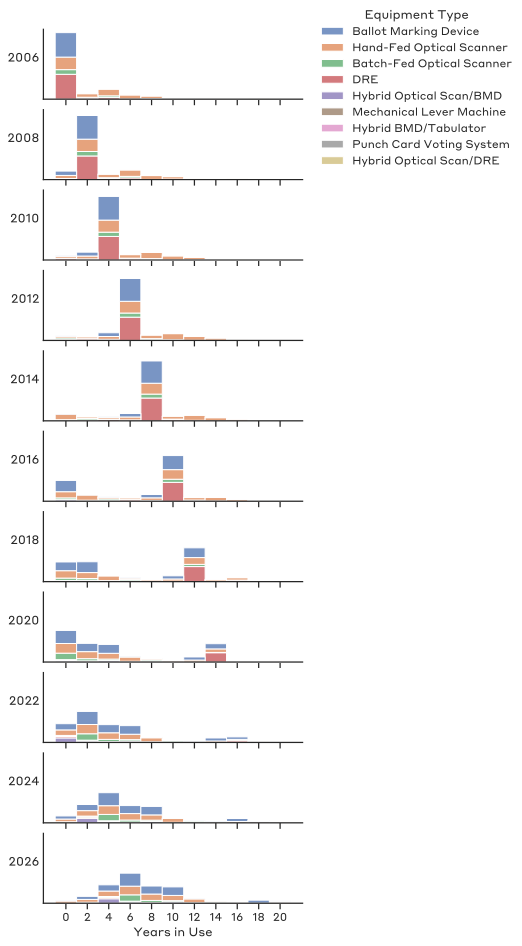

In [206]:
bins=np.arange(0,23,2)
midpoints = (bins[:-1] + bins[1:]) // 2
g = sns.displot(data=df, row='Year', x='Years in Use', kind='hist', height=1.2, aspect=4, bins=bins, hue='Equipment Type', multiple='stack', edgecolor='white')
g.legend.set_loc('upper right')

axes = g.axes
axes[0][0].set_yticks([])
axes[0][0].set_xticks(midpoints)
axes[0][0].set_xticklabels(bins[:-1])

for ax in axes:
    ax = ax[0]
    ax.set_ylabel(ax.title.get_text()[-4:], rotation=0, ha='right')
    ax.set_title('')  # Remove the title

plt.subplots_adjust(hspace=0.15)


# Histogram of equipment age (smooth)

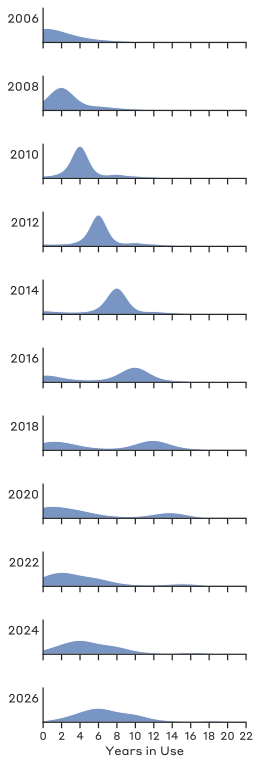

<Figure size 2400x1500 with 0 Axes>

In [207]:
bins=np.arange(0,23,2)
midpoints = (bins[:-1] + bins[1:]) // 2
g = sns.displot(data=df, row='Year', x='Years in Use', kind='kde', bw_adjust=2, height=1, aspect=4, multiple='stack', edgecolor='white')
plt.figure(figsize=figsize)
axes = g.axes
axes[0][0].set_yticks([])
axes[0][0].set_xticks(bins)
# axes[0][0].set_xticklabels(bins[:-1])
axes[0][0].set_xlim([bins[0], bins[-1]])

for ax in axes:
    ax = ax[0]
    ax.set_ylabel(ax.title.get_text()[-4:], rotation=0, ha='right')
    ax.set_title('')  # Remove the title

plt.subplots_adjust(hspace=0.15)


# Average age of equipment in 2026

In [16]:
voting_df_26 = df[df["Year"]==2026]
state_eq_len = pd.DataFrame(voting_df_26.groupby(["State"])["Years in Use"].mean())
state_eq_len.sort_values(["Years in Use"], ascending=False).round(1)

,Years in Use
State,
Puerto Rico,14.0
Oklahoma,14.0
Louisiana,13.8
Massachusetts,13.5
Indiana,13.0
Tennessee,10.6
Maine,10.3
Maryland,10.0
US Virgin Islands,10.0


# Do larger jurisdictions have newer equipment?
No. Analysis below.

In [17]:
# aggregate across equipment types within a jurisdictions
avg = voting_df_26.groupby('FIPS code').agg({
    'Registered Voters': 'mean',
    'Years in Use': 'mean'
}).reset_index()

avg

,FIPS code,Registered Voters,Years in Use
0,0100100000,41791.0,8.0
1,0100300000,180929.0,6.666667
2,0100500000,15697.0,8.0
3,0100700000,14304.0,5.0
4,0100900000,41203.0,8.0
...,...,...,...
6368,5604500000,3426.0,6.0
6369,6600000000,62091.0,4.0
6370,6900000000,18401.0,10.0
6371,7200000000,1987317.0,14.0


/var/folders/2f/3k2b0y_s79n84y37bcnb5t5h0000gn/T/ipykernel_40583/382879481.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), color='black')
/var/folders/2f/3k2b0y_s79n84y37bcnb5t5h0000gn/T/ipykernel_40583/382879481.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=ax.get_yticklabels(), color='black')


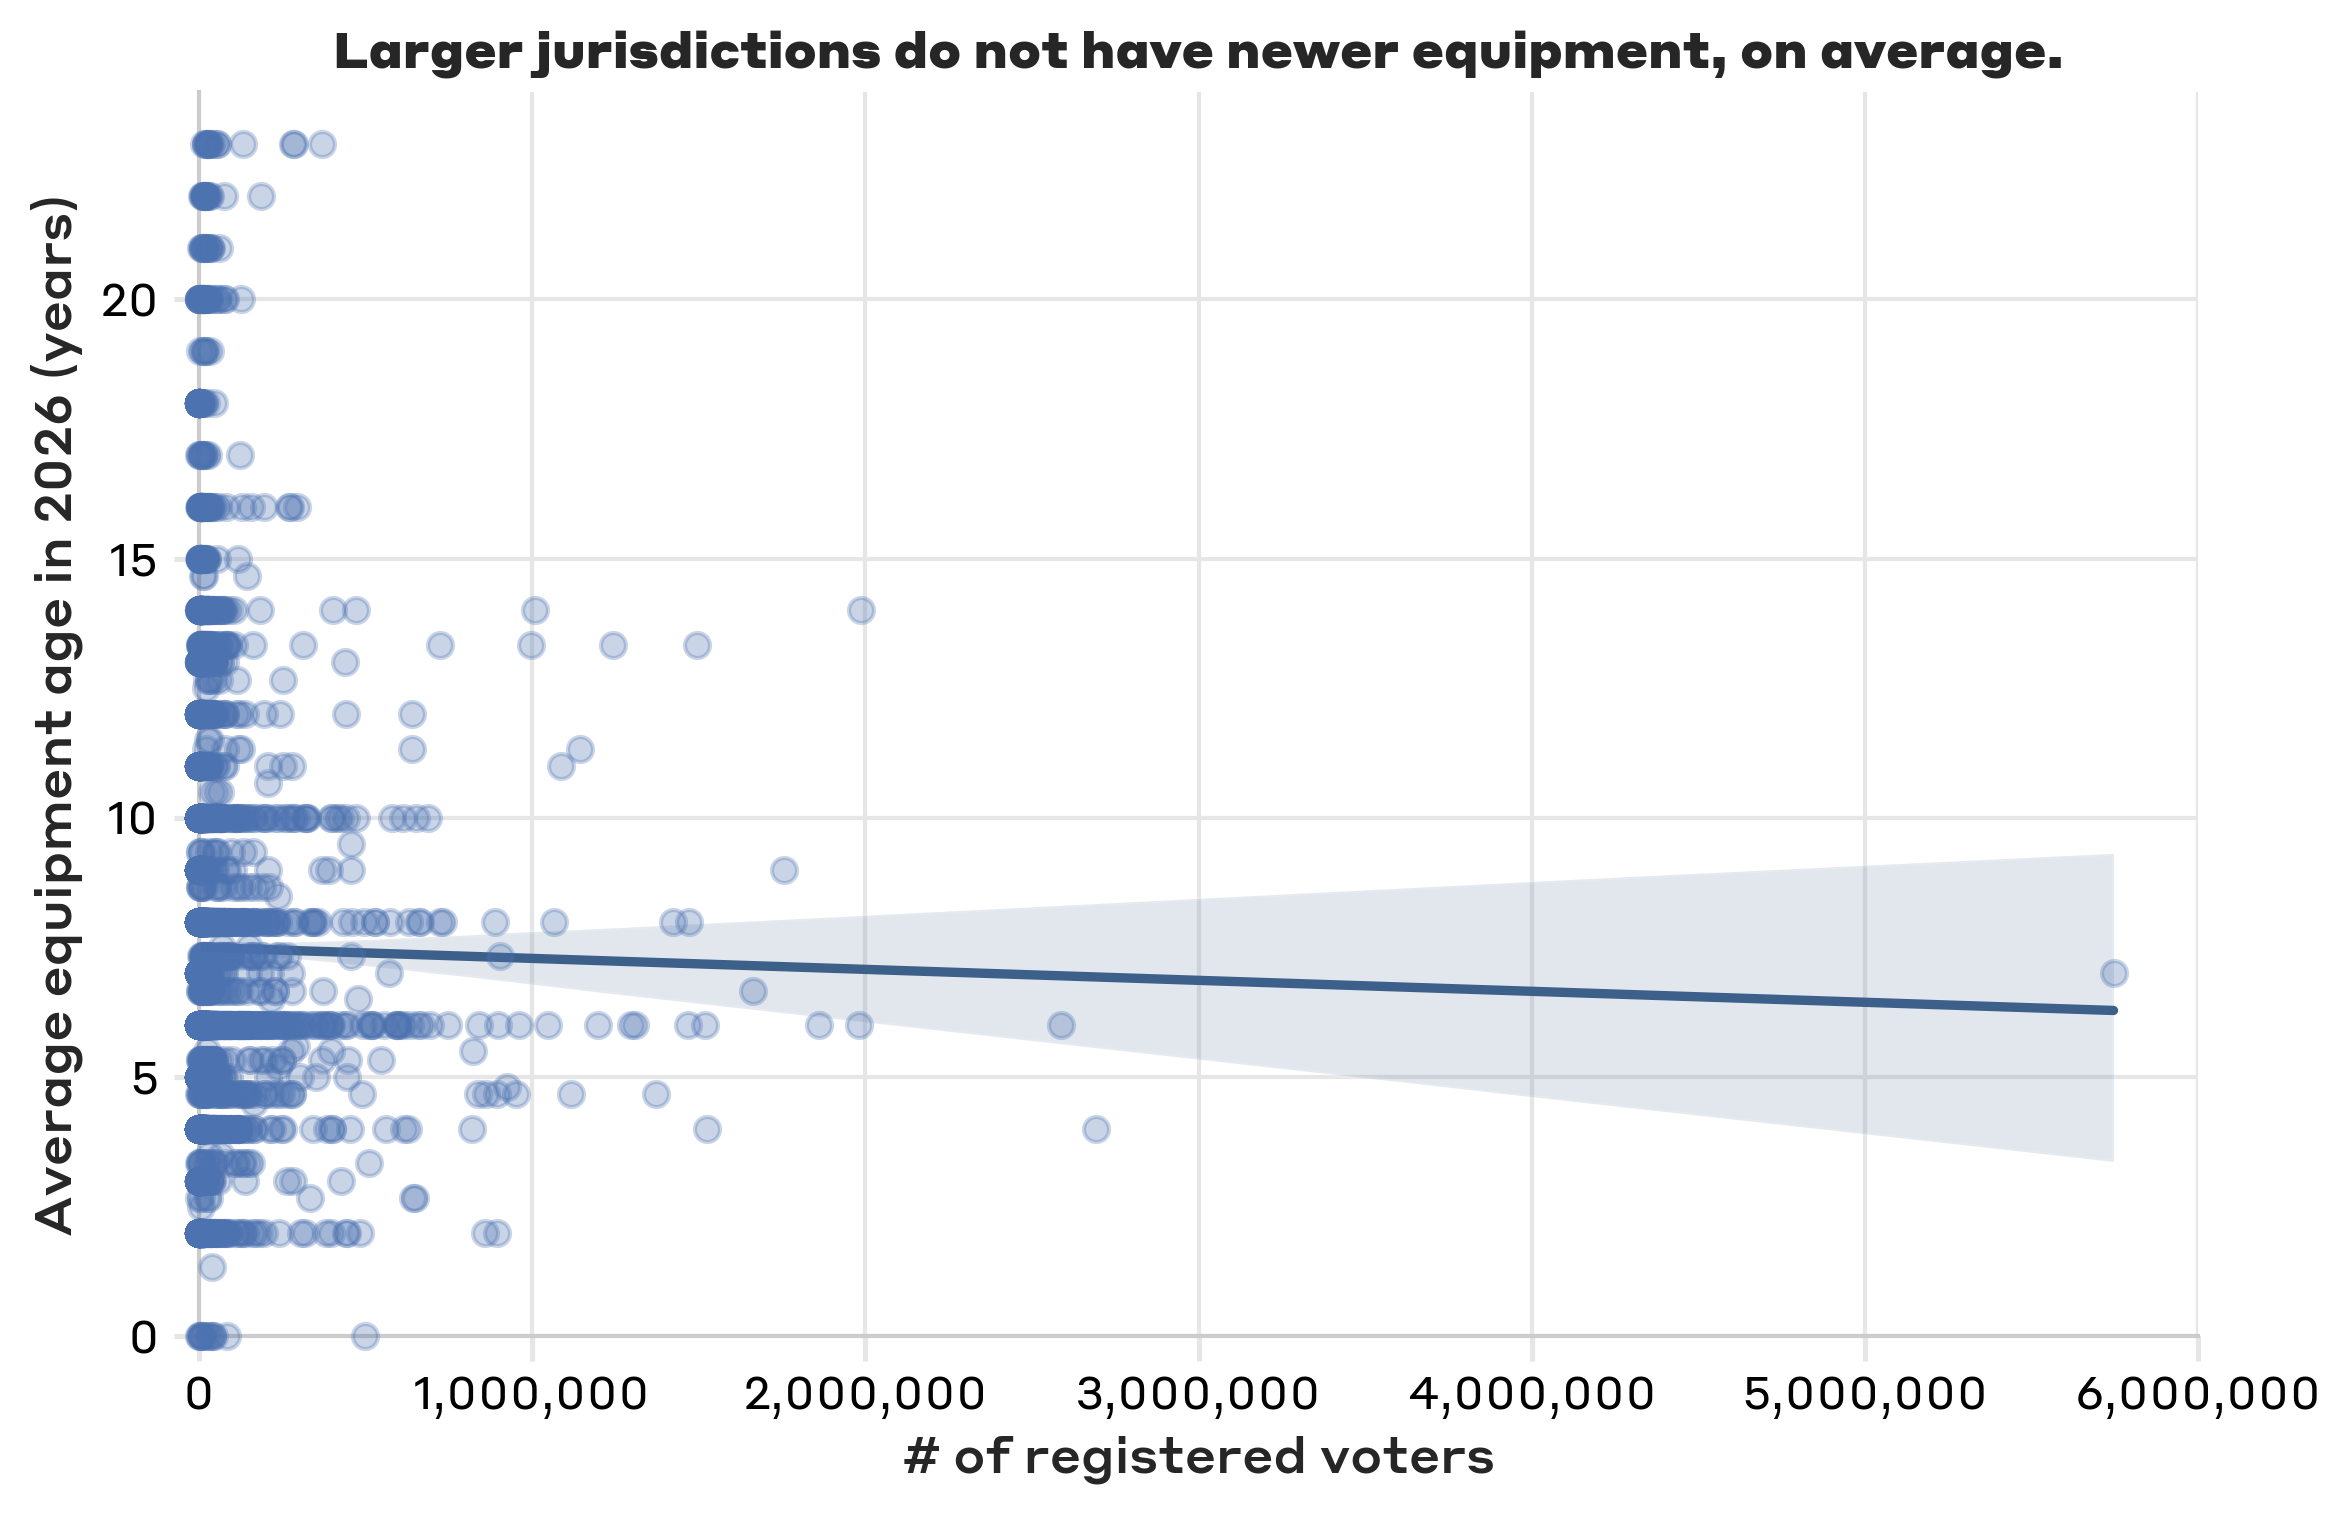

In [275]:
%config InlineBackend.figure_formats = ['png']

# Set up the plot style
axis_width = 1
sns.set_style("whitegrid", {"grid.color": ".9",
                            "font.family": "StyreneARegular",
                            'axes.spines.top': False,
                            'axes.spines.right': False,
                            'xtick.bottom': True,
                            'ytick.left': True,
                            'xtick.color': '.9',
                            'ytick.color': '.9'})
# Create the scatterplot with regression line
# plt.figure(figsize=figsize)
ax = sns.regplot(
    data=avg,
    x="Registered Voters",
    y="Years in Use",
    scatter_kws={"alpha": 0.3, 'clip_on': False, 'zorder': 10},
    line_kws={"color": blue},
    ci=95,  # Confidence interval for regression line
)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_linewidth(axis_width)

plt.xlabel("# of registered voters", fontname='StyreneAMedium')
plt.ylabel("Average equipment age in 2026 (years)", fontname='StyreneAMedium')
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlim([0, 6e6])
plt.ylim([0, 24])
ax.set_xticklabels(labels=ax.get_xticklabels(), color='black')
ax.set_yticklabels(labels=ax.get_yticklabels(), color='black')
plt.tight_layout()
plt.title("Larger jurisdictions do not have newer equipment, on average.", fontname='StyreneABlack');
plt.savefig('figs/age_vs_jurisdiction_size.png', bbox_inches='tight', dpi=300)

# Age of equipment over time

/var/folders/2f/3k2b0y_s79n84y37bcnb5t5h0000gn/T/ipykernel_40583/1936329088.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=ax.get_yticklabels(), color='black')


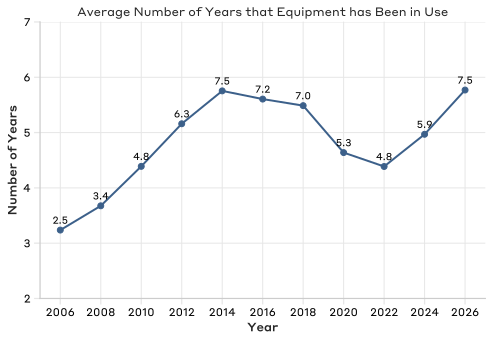

In [280]:
%config InlineBackend.figure_formats = ['svg']

years_in_use = df.groupby(["Year"])["Years in Use"].mean().reset_index()

# Plot
fig, ax = plt.subplots(figsize=figsize)
ax.plot(years_in_use["Year"], years_in_use["Years in Use"], marker="o", linestyle="-", color=blue, linewidth=2)

# Add data labels
for i, value in enumerate(years_in_use["Years in Use"]):
    ax.text(years_in_use["Year"][i], value+.15, f"{value:.1f}", ha="center", va="bottom", fontsize=10, color="black")

# Formatting
ax.set_ylabel("Number of Years", fontname='StyreneAMedium')
ax.set_xlabel("Year", fontname='StyreneAMedium')
ax.set_title("Average Number of Years that Equipment has Been in Use", fontsize=12)
ax.set_yticklabels(labels=ax.get_yticklabels(), color='black')

# Ensure x-axis ticks are formatted correctly
plt.xticks(years_in_use["Year"], rotation=0, ha="center")
ax.set_xticklabels(labels=ax.get_xticklabels(), color='black')

plt.ylim(0, 10)
plt.savefig("figs/avg_years_in_use.png")
plt.show()

/var/folders/2f/3k2b0y_s79n84y37bcnb5t5h0000gn/T/ipykernel_40583/1691066726.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=ax.get_yticklabels(), color='black')


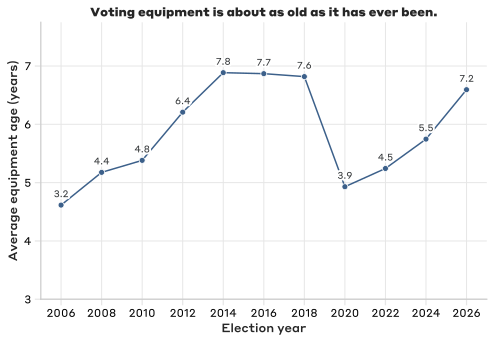

In [285]:
# Compute weighted average years in use per year
filtered_voting_df = df.dropna(subset=["Years in Use", "Registered Voters"])

years_in_use = (
    filtered_voting_df.groupby("Year")
    .apply(lambda x: np.average(x["Years in Use"], weights=x["Registered Voters"]), include_groups=False)
    .reset_index(name="Weighted Years in Use")
)

# Plot
%config InlineBackend.figure_formats = ['svg']

sns.lineplot(data=years_in_use, x="Year", y="Weighted Years in Use", marker="o",
        linestyle="-", color=blue, linewidth=1.5)

ax = plt.gca()

# Add data labels
for i, value in enumerate(years_in_use["Weighted Years in Use"]):
    ax.text(years_in_use["Year"][i], value +0.2, f"{value:.1f}", ha="center", va="bottom",
            fontsize=data_label_fontsize, color=darkgray,
            path_effects=[pe.withStroke(linewidth=4, foreground='white')])

# Formatting
ax.set_ylabel("Average equipment age (years)", fontname='StyreneAMedium')
ax.set_xlabel("Election year", fontname='StyreneAMedium')
ax.set_title("Voting equipment is about as old as it has ever been.", fontname='StyreneABlack')

# Ensure x-axis ticks are formatted correctly
plt.xticks(years_in_use["Year"], rotation=0, ha="center")
ax.set_xticklabels(labels=ax.get_xticklabels(), color='black')
ax.set_yticklabels(labels=ax.get_yticklabels(), color='black')
plt.ylim(0, 9.5)
plt.savefig("figs/weighted_avg_years_in_use_over_time.png", bbox_inches='tight', dpi=300)
plt.show()


(0.0, 50.0)

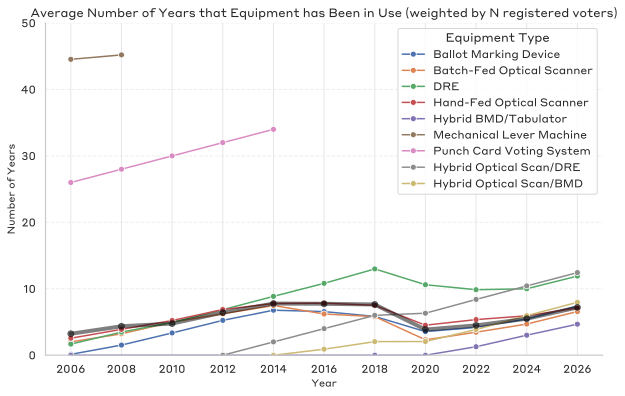

In [234]:
# same as above, but with breakout by equipment type

years_in_use = (
    filtered_voting_df.groupby("Year")
    .apply(lambda x: np.average(x["Years in Use"], weights=x["Registered Voters"]), include_groups=False)
    .reset_index(name="Weighted Years in Use")
)


years_in_use_breakout = (
    filtered_voting_df.groupby(['Year', 'Equipment Type'])
    .apply(lambda x: np.average(x["Years in Use"], weights=x["Registered Voters"]), include_groups=False)
    .reset_index(name="Weighted Years in Use")
)

# Plot with seaborn
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(ax=ax, data=years_in_use_breakout, x='Year', y='Weighted Years in Use', hue='Equipment Type', marker='o')

ax.plot(years_in_use["Year"], years_in_use["Weighted Years in Use"], marker="o", linestyle="-", color='black', linewidth=4, alpha=0.5)

# Formatting
ax.set_ylabel("Number of Years", fontsize=10)
ax.set_xlabel("Year", fontsize=10)
ax.set_title("Average Number of Years that Equipment has Been in Use (weighted by N registered voters)", fontsize=12)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Ensure x-axis ticks are formatted correctly
plt.xticks(years_in_use["Year"], rotation=0, ha="center")

plt.ylim(0, 50)


In [235]:
filtered_voting_df

,Year,FIPS code,State,Jurisdiction,Registered Voters,Equipment Type,Manufacturer,Model,First Year in Use,Years in Use,New Equipment,Final Year in Use,QR/Barcode,VVPAT,Election Day Standard,Election Day Accessible,Early Voting Standard,Early Voting Accessible,Mail Ballot/Absentee Equipment,Notes on usage
0,2006,0100100000,Alabama,Autauga County,29652,Ballot Marking Device,ES&S,AutoMARK,2006,0,True,False,False,<NA>,False,True,False,False,False,<NA>
1,2008,0100100000,Alabama,Autauga County,32669,Ballot Marking Device,ES&S,AutoMARK,2006,2,False,False,False,<NA>,False,True,False,False,False,<NA>
2,2010,0100100000,Alabama,Autauga County,29298,Ballot Marking Device,ES&S,AutoMARK,2006,4,False,False,False,<NA>,False,True,False,False,False,<NA>
3,2012,0100100000,Alabama,Autauga County,32494,Ballot Marking Device,ES&S,AutoMARK,2006,6,False,False,False,<NA>,False,True,False,False,False,<NA>
4,2014,0100100000,Alabama,Autauga County,33203,Ballot Marking Device,ES&S,AutoMARK,2006,8,False,False,False,<NA>,False,True,False,False,False,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279811,2018,7800000000,US Virgin Islands,US Virgin Islands,24314,Hand-Fed Optical Scanner,ES&S,DS200,2014,4,False,False,<NA>,<NA>,True,False,True,False,True,<NA>
279812,2020,7800000000,US Virgin Islands,US Virgin Islands,53341,Hand-Fed Optical Scanner,ES&S,DS200,2014,6,False,False,<NA>,<NA>,True,False,True,False,True,<NA>
279813,2022,7800000000,US Virgin Islands,US Virgin Islands,39910,Hand-Fed Optical Scanner,ES&S,DS200,2014,8,False,False,<NA>,<NA>,True,False,True,False,True,<NA>
279814,2024,7800000000,US Virgin Islands,US Virgin Islands,30892,Hand-Fed Optical Scanner,ES&S,DS200,2014,10,False,False,<NA>,<NA>,True,False,True,False,True,<NA>


In [236]:
# Split out just the rows with New Equipment = True
new_eq = df[df['New Equipment'] == True].copy()

# Create a shifted Year column for lookup
new_eq['Prev Year'] = new_eq['Year'] - 2

# Merge with the original dataframe to find matches from two years earlier
merged = pd.merge(
    new_eq,
    df,
    left_on=['State', 'Jurisdiction', 'Model', 'Prev Year'],
    right_on=['State', 'Jurisdiction', 'Model', 'Year'],
    suffixes=('_new', '_prev')
)

# Optional: select only columns of interest
result = merged[[
    'State', 'Jurisdiction', 'Model',
    'Year_prev', 'New Equipment_prev',
    'Year_new', 'New Equipment_new'
]]

# Sort or inspect
result = result.sort_values(by=['State', 'Jurisdiction', 'Model', 'Year_new'])


In [237]:
fv = filtered_voting_df.copy()
fv[(fv['State']=='Texas') & (fv['Jurisdiction']=='Kendall County') & (fv['Model']=='DS200')]

,Year,FIPS code,State,Jurisdiction,Registered Voters,Equipment Type,Manufacturer,Model,First Year in Use,Years in Use,New Equipment,Final Year in Use,QR/Barcode,VVPAT,Election Day Standard,Election Day Accessible,Early Voting Standard,Early Voting Accessible,Mail Ballot/Absentee Equipment,Notes on usage
191857,2024,4825900000,Texas,Kendall County,38959,Batch-Fed Optical Scanner,ES&S,DS200,2024,0,True,False,<NA>,<NA>,True,False,True,False,True,<NA>
191858,2026,4825900000,Texas,Kendall County,38959,Batch-Fed Optical Scanner,ES&S,DS200,2024,2,False,False,<NA>,<NA>,True,False,True,False,True,<NA>
191872,2020,4825900000,Texas,Kendall County,31421,Hand-Fed Optical Scanner,ES&S,DS200,2020,0,True,False,<NA>,<NA>,True,False,True,False,True,<NA>
191873,2022,4825900000,Texas,Kendall County,33833,Hand-Fed Optical Scanner,ES&S,DS200,2020,2,False,False,<NA>,<NA>,True,False,True,False,True,<NA>


# Compare age of current equipment to typical age at retirement (weighted by N registered voters)

In [238]:
# sanity check on N voters before using it to calculate weighted average
n = df[df['Year']==2026].drop_duplicates(subset='FIPS code', keep='first')['Registered Voters'].sum()
f"{n:,} registered voters across jurisdictions with voting equipment in 2026"

# https://www.eac.gov/sites/default/files/2024-11/2022_EAVS_Report_508c.pdf#page=6
# "More than 203 million individuals were
# active registered voters for the 2022 general election,"
# this is close enough, i think! sanity check passed

'221,877,727 registered voters across jurisdictions with voting equipment in 2026'

In [306]:
# Function to calculate weighted average and weighted std
def weighted_stats(group):
    weights = group["Registered Voters"]
    values = group["Years in Use"]
    
    # Weighted average
    avg = np.average(values, weights=weights)
    
    # Weighted standard deviation
    variance = np.average((values - avg)**2, weights=weights)
    std_dev = np.sqrt(variance)

    N = len(group)
    
    return pd.Series({
        "Weighted Avg Age": avg,
        "Weighted Std Age": std_dev,
        "N": N
    })

filtered_df = df.dropna(subset=['Registered Voters', 'Years in Use', 'Equipment Type'])
# Apply function by Equipment Type
age_at_retirement = filtered_df[filtered_df['Final Year in Use']==True].groupby("Equipment Type").apply(weighted_stats, include_groups=False).reset_index()

# View result
age_at_retirement

current_age = filtered_df[filtered_df['Year'] == 2026].groupby("Equipment Type").apply(weighted_stats, include_groups=False).reset_index()

retirement_df = pd.merge(current_age, age_at_retirement, on='Equipment Type', how='left', suffixes=(' Current', ' At Retirement'))
retirement_df = retirement_df.loc[[3, 1, 0, 2, 5, 4]].reset_index(drop=True)
retirement_df.round(1)

,Equipment Type,Weighted Avg Age Current,Weighted Std Age Current,N Current,Weighted Avg Age At Retirement,Weighted Std Age At Retirement,N At Retirement
0,Hand-Fed Optical Scanner,7.1,4.6,4331.0,9.2,5.4,6003.0
1,Batch-Fed Optical Scanner,6.6,2.8,1519.0,8.5,4.9,1305.0
2,Ballot Marking Device,7.4,4.0,4998.0,7.6,5.6,3518.0
3,DRE,11.9,7.9,414.0,9.2,5.9,4502.0
4,Hybrid Optical Scan/BMD,8.0,2.7,938.0,2.2,1.4,24.0
5,Hybrid BMD/Tabulator,4.7,1.7,34.0,0.8,1.0,4.0


In [307]:
# show value_counts on a column that merges the "Manufacturer" + "Model" columns
filtered_df['Manufacturer + Model'] = filtered_df['Manufacturer'] + ' ' + filtered_df['Model']


filtered_df[(filtered_df['Equipment Type']=='Hybrid BMD/Tabulator') & (filtered_df['Year']==2026)]['Manufacturer + Model'].value_counts().reset_index()

/var/folders/2f/3k2b0y_s79n84y37bcnb5t5h0000gn/T/ipykernel_40583/3025088390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Manufacturer + Model'] = filtered_df['Manufacturer'] + ' ' + filtered_df['Model']


,Manufacturer + Model,count
0,ES&S ExpressVote XL,20
1,ES&S ExpressVote Tabulator,14


In [ ]:
retirement_df = retirement_df.loc[[3, 2, 1, 0, 4, 5]].reset_index(drop=True)
retirement_df['delta'] = retirement_df['Weighted Avg Age Current'] - retirement_df['Weighted Avg Age At Retirement']

/var/folders/2f/3k2b0y_s79n84y37bcnb5t5h0000gn/T/ipykernel_40583/2291274332.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(0, 20, 2), color='black')


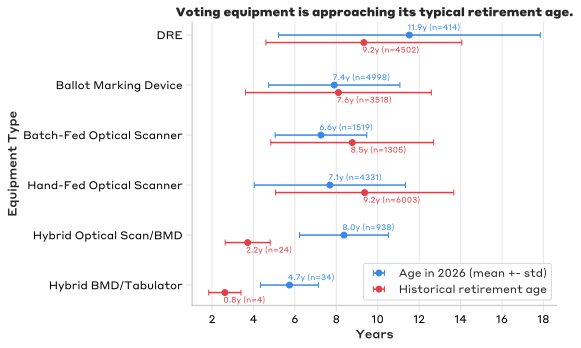

In [310]:
fig, ax = plt.subplots()
y = np.arange(len(retirement_df))

# Plot current age
ax.errorbar(retirement_df['Weighted Avg Age Current'], y, xerr=retirement_df['Weighted Std Age Current'],
            fmt='o', color=lightblue, label='Age in 2026 (mean +- std)', capsize=3,
            linewidth=1.5)

# Annotate current age
for i, row in retirement_df.iterrows():
    label = f"{row['Weighted Avg Age Current']:.1f}y (n={int(row['N Current'])})"
    ax.text(row['Weighted Avg Age Current'] - 0.1, y[i] - 0.1, label, color=lightblue, fontsize=8)

# Plot retirement age
for i, row in retirement_df.iterrows():
    if pd.notnull(row['Weighted Avg Age At Retirement']):
        label = 'Historical retirement age' if i == 0 else ''
        ax.errorbar(row['Weighted Avg Age At Retirement'], y[i] + 0.15,
                    xerr=row['Weighted Std Age At Retirement'], fmt='o', label=label,
                    color=red, capsize=3)

# Annotate retirement age
for i, row in retirement_df.iterrows():
    label = f"{row['Weighted Avg Age At Retirement']:.1f}y (n={int(row['N At Retirement'])})"
    ax.text(row['Weighted Avg Age At Retirement'] - 0.1, y[i] + 0.35, label, color=red, fontsize=8)


# Formatting
ax.set_yticks(y)
ax.set_yticklabels(retirement_df['Equipment Type'], color='black')
ax.set_xticklabels(np.arange(0, 20, 2), color='black')
ax.invert_yaxis()  # So first row is on top
ax.set_xlabel('Years', fontname='StyreneAMedium')
ax.set_ylabel('Equipment Type', fontname='StyreneAMedium')
ax.set_title('Voting equipment is approaching its typical retirement age.', fontname='StyreneABlack')
ax.grid(True, axis='x')
ax.grid(False, axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('figs/avg_age_and_retirement_age.png', bbox_inches='tight', dpi=300)


In [312]:
retirement_df = retirement_df[~retirement_df['Equipment Type'].str.contains('Hybrid')]


/var/folders/2f/3k2b0y_s79n84y37bcnb5t5h0000gn/T/ipykernel_40583/2857041957.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), color='black')


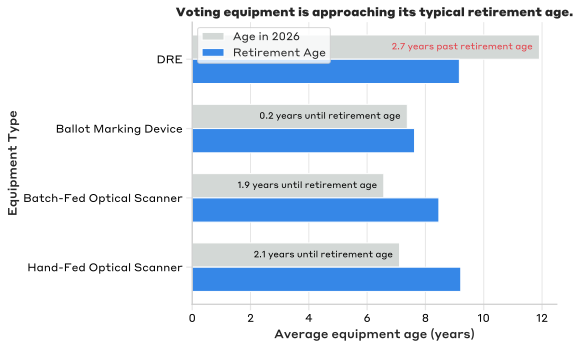

In [350]:
fig, ax = plt.subplots()

bar_width = 0.35
x = np.arange(len(retirement_df))

# Plot bars
age_bars = ax.barh(x - bar_width/2, retirement_df["Weighted Avg Age Current"], height=bar_width, label="Age in 2026",
                   color=lightgray)
retirement_bars = ax.barh(x + bar_width/2, retirement_df["Weighted Avg Age At Retirement"], height=bar_width, label="Retirement Age",
                          color=lightblue)

# Annotate differences
for i, row in retirement_df.iterrows():
    # Determine which is smaller to anchor the label
    end_x  = row["Weighted Avg Age Current"]
    y = i - bar_width/2
    if row['delta'] < 0:
        color = 'black'
    else:
        color = red
    
    ax.annotate(
        f"{abs(row['delta']):.1f} years {'past' if row['delta'] > 0 else 'until'} retirement age",
        xy=(end_x-0.23, y),
        ha='right', va='center',
        fontsize=9,
        color=color,
        # fontname='StyreneAMedium',
        # bbox=dict(boxstyle="round,pad=0.2", edgecolor='gray', facecolor='white', alpha=0.7)
    )

# Formatting
ax.set_yticks(x)
ax.set_yticklabels(retirement_df["Equipment Type"], color='black')
ax.set_xticklabels(labels=ax.get_xticklabels(), color='black')

ax.invert_yaxis()
ax.set_xlabel("Average equipment age (years)", fontname='StyreneAMedium')
ax.set_ylabel("Equipment Type", fontname='StyreneAMedium')
ax.set_title("Voting equipment is approaching its typical retirement age.", fontname='StyreneABlack')
ax.legend(loc='upper left')
ax.grid(False, axis='y')
ax.grid(True, axis='x')

plt.tight_layout()
plt.savefig('figs/avg_age_and_retirement_age_small.png', bbox_inches='tight', dpi=300)

In [ ]:

# Annotate differences
for i, row in filtered_data.iterrows():
    # Determine which is smaller to anchor the label
    if row["Delta"] > 0:
        start = row["Retirement Age"]
        end = row["Age in 2026"]
        y_text = i - bar_width/2
    else:
        start = row["Age in 2026"]
        end = row["Retirement Age"]
        y_text = i + bar_width/2
    ax.annotate(
        f"{abs(row['Delta']):.1f} years {'past' if row['Delta'] > 0 else 'before'} retirement age",
        xy=((start + end) / 2, y_text),
        ha='center', va='center',
        fontsize=9, color='black',
        bbox=dict(boxstyle="round,pad=0.2", edgecolor='gray', facecolor='white', alpha=0.7)
    )

# Formatting
ax.set_yticks(x)
ax.set_yticklabels(filtered_data["Equipment Type"])
ax.invert_yaxis()
ax.set_xlabel("Years")
ax.set_title("Voting Equipment Age in 2026 vs. Historical Retirement Age")
ax.legend()

plt.tight_layout()
plt.show()


# New equipment acquisitions

/var/folders/2f/3k2b0y_s79n84y37bcnb5t5h0000gn/T/ipykernel_40583/4122838390.py:6: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.lineplot(data=df_grouped, x='Year', y='Count',


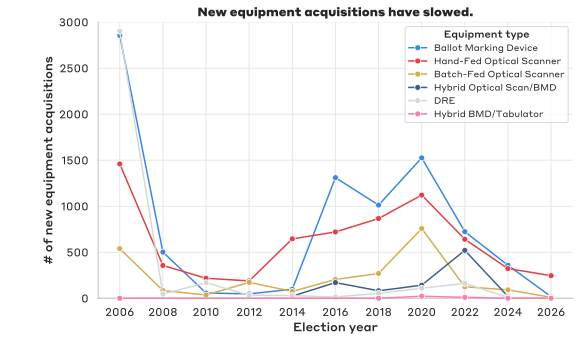

In [239]:
# Group by year and equipment type, and count
df_grouped = df[df['New Equipment']].groupby(['Year', 'Equipment Type']).size().reset_index(name='Count')
palette = [lightblue, red, mustard, blue, lightgray, pink, purple, darkblue]

# Plot with seaborn
sns.lineplot(data=df_grouped, x='Year', y='Count',
             hue='Equipment Type', marker='o', linewidth=1.5, palette=palette,
             hue_order=['Ballot Marking Device', 'Hand-Fed Optical Scanner', 'Batch-Fed Optical Scanner',
                        'Hybrid Optical Scan/BMD',
                        'DRE', 'Hybrid BMD/Tabulator'],
            clip_on=False,
            zorder=10)

plt.legend(title="Equipment type", title_fontproperties={'family':'StyreneAMedium', 'size': 10}, fontsize=9)

plt.title('New equipment acquisitions have slowed.', fontname='StyreneABlack')
plt.xlabel('Election year', fontname='StyreneAMedium')
plt.ylabel('# of new equipment acquisitions', fontname='StyreneAMedium')
plt.xticks(sorted(df['Year'].unique()))
plt.ylim([0, 3000])
plt.grid(True)
plt.tight_layout()
plt.savefig('figs/new_equipment_acquisitions_by_type.png', bbox_inches='tight', dpi=300)


When new voting equipment infusions happen

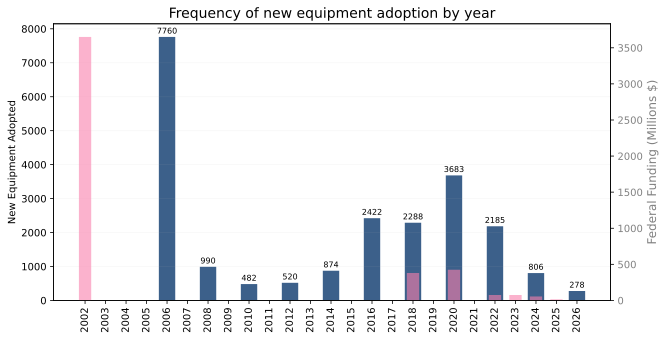

In [15]:
year_enacted = [2002, 2018, 2020, 2020, 2022, 2023, 2024, 2025,2026]
federal_funding_millions = [3650, 380, 400, 425, 75, 75, 55, 15,0]

# Compute new equipment counts per year
new_equipment_counts = df.groupby("Year")["New Equipment"].sum()

# Convert index to integers for consistent plotting
new_equipment_counts.index = new_equipment_counts.index.astype(int)

# Ensure all years are included in the x-axis range
all_years = np.arange(min(year_enacted), max(year_enacted) + 1)

# Align federal funding with years
funding_dict = dict(zip(year_enacted, federal_funding_millions))
funding_values = [funding_dict.get(year, 0) for year in all_years]  # Fill missing years with 0

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.grid(axis="y", linestyle="-", alpha=0.1)

# Primary y-axis (New Equipment Adoption)
ax1.bar(new_equipment_counts.index, new_equipment_counts, color=blue)
ax1.set_ylabel("New Equipment Adopted")

# Add data labels
for year, value in new_equipment_counts.items():
    ax1.text(year, value + 100, str(value), ha="center", fontsize=8)

# Secondary y-axis (Federal Funding)
ax2 = ax1.twinx()
ax2.bar(all_years, funding_values, color=pink, alpha=0.6, label="Federal Funding ($M)", width=0.6)
ax2.set_ylabel("Federal Funding (Millions $)", fontsize=12, color="gray")
ax2.tick_params(axis="y", labelcolor="gray")

# Set x-axis to show all years
ax1.set_xticks(all_years)
ax1.set_xticklabels(all_years, rotation=90)

# Titles & Legends
ax1.set_title("Frequency of new equipment adoption by year", fontsize=14)
plt.savefig("figs/new_eq_freq_gap.png")
plt.show()